In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re

In [2]:
original_df= pd.read_csv("original_df.csv")
original_df.head()

,id,content
0,etfi0m,America’s New Drinking Problem? The Trump Admi...
1,etouq6,Trump’s gutting of environmental rules is push...
2,etp02h,Greta Thunberg brushes off mockery from U.S. f...
3,etpv53,"'It's a crisis, not a change': the six Guardia..."
4,etsaxl,The Future will be Worse than We Thought


In [3]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12412 entries, 0 to 12411
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       12412 non-null  object
 1   content  12412 non-null  object
dtypes: object(2)
memory usage: 194.1+ KB


In [4]:
df=original_df.copy()

In [5]:
print('Training Set Shape = {}'.format(df.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(df.memory_usage().sum() / 1024**2))

Training Set Shape = (12412, 2)
Training Set Memory Usage = 0.19 MB


In [6]:
df["content"][0]

'America’s New Drinking Problem? The Trump Administration Rolls Back the Clean Water Act  \\n\\n[https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be](https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be)\\n\\nPresident Trump’s EPA just restricted the bodies of water that the federal government can regulate to: the territorial seas and traditional navigable waters, Perennial and intermittent tributaries to those waters, Certain lakes, ponds, and impoundments, and Wetlands adjacent to jurisdictional waters. This unfortunately means that the federal government is no longer enforcing laws over many other waters, including groundwater, wetlands that are not adjacent to large bodies of water, some seasonal streams that flow for only a portion of the year,  and “ephemeral” streams that only flow after rainstorms. Here’s what the means!'

### What are contractions?

Contractions are words or combinations of words that are shortened by dropping letters and replacing them by an apostrophe.

Nowadays, where everything is shifting online, we communicate with others more through text messages or posts on different social media like Facebook, Instagram, Whatsapp, Twitter, LinkedIn, etc. in the form of texts. With so many people to talk, we rely on abbreviations and shortened form of words for texting people.

In [7]:
# Dictionary of English Contractions
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have", "Here's":"here is"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

In [8]:
# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
    def replace(match):
        return contractions_dict[match.group(0)]
    return contractions_re.sub(replace, text)

In [9]:
# Expanding Contractions in the reviews
df['content'] = df['content'].apply(lambda x:expand_contractions(x))

In [10]:
df["content"][0]

'America’s New Drinking Problem? The Trump Administration Rolls Back the Clean Water Act  \\n\\n[https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be](https://www.youtube.com/watch?v=K1eBxEwiqi4&amp;feature=youtu.be)\\n\\nPresident Trump’s EPA just restricted the bodies of water that the federal government can regulate to: the territorial seas and traditional navigable waters, Perennial and intermittent tributaries to those waters, Certain lakes, ponds, and impoundments, and Wetlands adjacent to jurisdictional waters. This unfortunately means that the federal government is no longer enforcing laws over many other waters, including groundwater, wetlands that are not adjacent to large bodies of water, some seasonal streams that flow for only a portion of the year,  and “ephemeral” streams that only flow after rainstorms. Here’s what the means!'

### 1) Text Cleaning

In [11]:
import neattext.functions as nfx

In [12]:
# This directory comes from neattext package to clean our text data.
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

#### 1.1)Remove URL

In [13]:
df['content'] = df['content'].apply(nfx.remove_urls)
len(df["content"][0])

732

In [14]:
df["content"][0]

'America’s New Drinking Problem? The Trump Administration Rolls Back the Clean Water Act  \\n\\n[]()\\n\\nPresident Trump’s EPA just restricted the bodies of water that the federal government can regulate to: the territorial seas and traditional navigable waters, Perennial and intermittent tributaries to those waters, Certain lakes, ponds, and impoundments, and Wetlands adjacent to jurisdictional waters. This unfortunately means that the federal government is no longer enforcing laws over many other waters, including groundwater, wetlands that are not adjacent to large bodies of water, some seasonal streams that flow for only a portion of the year,  and “ephemeral” streams that only flow after rainstorms. Here’s what the means!'

#### 1.2)Remove special_characters

In [15]:
df['content'] = df['content'].apply(nfx.remove_special_characters)
len(df["content"][0])
df["content"][0]

'Americas New Drinking Problem The Trump Administration Rolls Back the Clean Water Act  nnnnPresident Trumps EPA just restricted the bodies of water that the federal government can regulate to the territorial seas and traditional navigable waters Perennial and intermittent tributaries to those waters Certain lakes ponds and impoundments and Wetlands adjacent to jurisdictional waters This unfortunately means that the federal government is no longer enforcing laws over many other waters including groundwater wetlands that are not adjacent to large bodies of water some seasonal streams that flow for only a portion of the year  and ephemeral streams that only flow after rainstorms Heres what the means'

#### 1.3)Remove Emojis

In [16]:
df['content'] = df['content'].apply(nfx.remove_emojis)
print(len(df["content"][0]))
df["content"][0]


705


'Americas New Drinking Problem The Trump Administration Rolls Back the Clean Water Act  nnnnPresident Trumps EPA just restricted the bodies of water that the federal government can regulate to the territorial seas and traditional navigable waters Perennial and intermittent tributaries to those waters Certain lakes ponds and impoundments and Wetlands adjacent to jurisdictional waters This unfortunately means that the federal government is no longer enforcing laws over many other waters including groundwater wetlands that are not adjacent to large bodies of water some seasonal streams that flow for only a portion of the year  and ephemeral streams that only flow after rainstorms Heres what the means'

#### 1.4)Remove Emails

In [17]:
df['content'] = df['content'].apply(nfx.remove_emails)
print(len(df["content"][0]))
df["content"][0]

705


'Americas New Drinking Problem The Trump Administration Rolls Back the Clean Water Act  nnnnPresident Trumps EPA just restricted the bodies of water that the federal government can regulate to the territorial seas and traditional navigable waters Perennial and intermittent tributaries to those waters Certain lakes ponds and impoundments and Wetlands adjacent to jurisdictional waters This unfortunately means that the federal government is no longer enforcing laws over many other waters including groundwater wetlands that are not adjacent to large bodies of water some seasonal streams that flow for only a portion of the year  and ephemeral streams that only flow after rainstorms Heres what the means'

#### 1.5)Remove Punctuation

In [18]:
df['content'] = df['content'].apply(nfx.remove_puncts)
print(len(df["content"][0]))
df["content"][0]

705


'Americas New Drinking Problem The Trump Administration Rolls Back the Clean Water Act  nnnnPresident Trumps EPA just restricted the bodies of water that the federal government can regulate to the territorial seas and traditional navigable waters Perennial and intermittent tributaries to those waters Certain lakes ponds and impoundments and Wetlands adjacent to jurisdictional waters This unfortunately means that the federal government is no longer enforcing laws over many other waters including groundwater wetlands that are not adjacent to large bodies of water some seasonal streams that flow for only a portion of the year  and ephemeral streams that only flow after rainstorms Heres what the means'

#### 1.6)Remove Stopwords

In [19]:
df['content'] = df['content'].apply(nfx.remove_stopwords)
print(len(df["content"][0]))
df["content"][0]

518


'Americas New Drinking Problem Trump Administration Rolls Clean Water Act nnnnPresident Trumps EPA restricted bodies water federal government regulate territorial seas traditional navigable waters Perennial intermittent tributaries waters Certain lakes ponds impoundments Wetlands adjacent jurisdictional waters unfortunately means federal government longer enforcing laws waters including groundwater wetlands adjacent large bodies water seasonal streams flow portion year ephemeral streams flow rainstorms Heres means'

#### 1.7)Remove Numbers

In [20]:
df['content'] = df['content'].apply(nfx.remove_numbers)
print(len(df["content"][0]))
df["content"][0]

518


'Americas New Drinking Problem Trump Administration Rolls Clean Water Act nnnnPresident Trumps EPA restricted bodies water federal government regulate territorial seas traditional navigable waters Perennial intermittent tributaries waters Certain lakes ponds impoundments Wetlands adjacent jurisdictional waters unfortunately means federal government longer enforcing laws waters including groundwater wetlands adjacent large bodies water seasonal streams flow portion year ephemeral streams flow rainstorms Heres means'

#### 1.8)Lowering the case

In [21]:
df["content"]= df["content"].apply(lambda x: x.lower())
df["content"][0]

'americas new drinking problem trump administration rolls clean water act nnnnpresident trumps epa restricted bodies water federal government regulate territorial seas traditional navigable waters perennial intermittent tributaries waters certain lakes ponds impoundments wetlands adjacent jurisdictional waters unfortunately means federal government longer enforcing laws waters including groundwater wetlands adjacent large bodies water seasonal streams flow portion year ephemeral streams flow rainstorms heres means'

In [22]:
import numpy as np

def plot_word_length_histogram(text):
    text.str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()

In [23]:
plot_word_length_histogram(df["content"])

C:\Users\Naim Cavin\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\Naim Cavin\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [24]:
corpus=[]
new= df["content"].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

In [25]:
from collections import defaultdict
dic=defaultdict(int)

We will use the counter function from the collections library to count and store the occurrences of each word in a list of tuples. This is a very useful function when we deal with word-level analysis in natural language processing.

In [26]:
from collections import Counter

In [27]:
counter=Counter(corpus)
most=counter.most_common()

In [28]:
x, y= [], []
for word,count in most[:40]:
    x.append(word)
    y.append(count)

<AxesSubplot:>

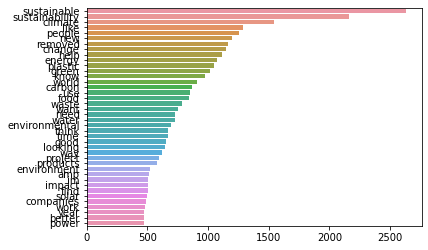

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=y,y=x)


## Ngram exploration
Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

In [30]:
from nltk.util import ngrams

In [31]:
list(ngrams(['I' ,'went','to','the','river','bank'],2))


[('I', 'went'),
 ('went', 'to'),
 ('to', 'the'),
 ('the', 'river'),
 ('river', 'bank')]

To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form.

In [32]:
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

In [33]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

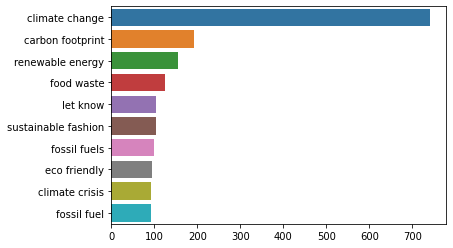

In [34]:
plot_top_ngrams_barchart(df["content"],2)

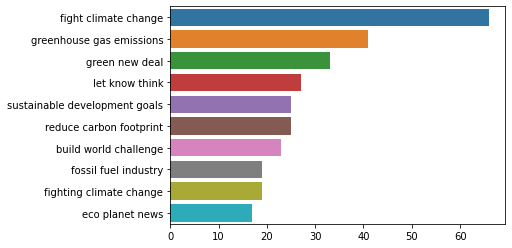

In [35]:
plot_top_ngrams_barchart(df["content"],3)

## Topic modeling exploration with pyLDAvis

Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents.

Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words.

Once we categorize our documents in topics we can dig into further data exploration for each topic or topic group.

But before getting into topic modeling we have to pre-process our data a little. We will:

- tokenize: the process by which sentences are converted to a list of tokens or words.
- remove stopwords
- lemmatize: reduces the inflectional forms of each word into a common base or root.
- convert to the bag of words: Bag of words is a dictionary where the keys are words(or ngrams/tokens) and values are the number of times each word occurs in the corpus.

In [36]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
import numpy as np
import nltk
from nltk.corpus import stopwords
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize

In [38]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [39]:
def get_lda_objects(text):
    nltk.download('stopwords')    
    stop=set(stopwords.words('english'))

    
    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]
    
    lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
    return lda_model, bow_corpus, dic

C:\Users\Naim Cavin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
def plot_lda_vis(lda_model, bow_corpus, dic):
    pyLDAvis.enable_notebook()
    vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
    return vis

C:\Users\Naim Cavin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
lda_model, bow_corpus, dic = get_lda_objects(df["content"])

C:\Users\Naim Cavin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


lda_model.show_topics()

In [43]:
# Gensim
import gensim, spacy, logging, warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [44]:
plot_lda_vis(lda_model, bow_corpus, dic)

AttributeError: module 'pyLDAvis' has no attribute 'gensim'

### Wordcloud

Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

Creating wordcloud in python with is easy but we need the data in a form of a corpus. Luckily, I prepared it in the previous section.

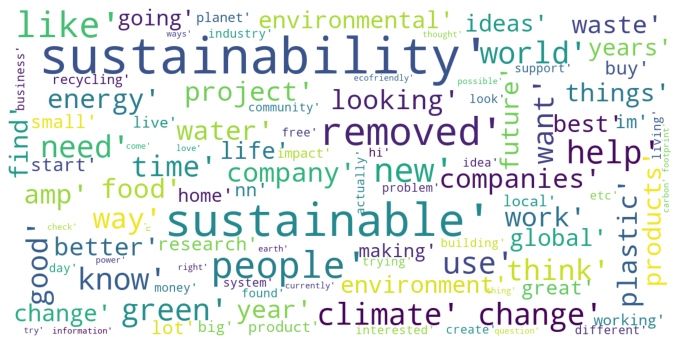

In [45]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### Textblob
Textblob is a python library built on top of nltk. It has been around for some time and is very easy and convenient to use.

The sentiment function of TextBlob returns two properties:

- ***polarity:*** is a floating-point number that lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.
- ***subjectivity:*** refers to how someone’s judgment is shaped by personal opinions and feelings. Subjectivity is represented as a floating-point value which lies in the range of [0,1].

In [48]:
from textblob import TextBlob
TextBlob('100 people killed in Iraq').sentiment

Sentiment(polarity=-0.2, subjectivity=0.0)

In [58]:
TextBlob('ISIS has slaughtered 1000 innocent people').sentiment

Sentiment(polarity=0.5, subjectivity=0.7)

In [60]:
TextBlob('terrorists slaughtered 1000 innocent people').sentiment

Sentiment(polarity=0.5, subjectivity=0.7)

In [61]:
TextBlob('I neither fuck your mom nor father').sentiment

Sentiment(polarity=-0.4, subjectivity=0.6)

In [62]:
TextBlob('my tv is broken').sentiment

Sentiment(polarity=-0.4, subjectivity=0.4)

#### I DONT TRUST TEXTBLOB

## Vader sentiment analysis
The next library we are going to discuss is VADER. Vader works better in detecting negative sentiment. It is very useful in the case of social media text sentiment analysis.

VADER or ***Valence Aware Dictionary and Sentiment Reasoner*** is a rule/lexicon-based, open-source sentiment analyzer pre-built library, protected under the MIT license.

VADER sentiment analysis class returns a dictionary that contains the probabilities of the text for being positive, negative and neutral. Then we can filter and choose the sentiment with most probability.

In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Naim
[nltk_data]     Cavin/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
def get_vader_score(sent):
    # Polarity score returns dictionary
    ss = sid.polarity_scores(sent)
    #return ss
    return np.argmax(list(ss.values())[:-1])

In [65]:
df["polarity"]=df["content"].\
    map(lambda x: get_vader_score(x))
polarity=df['polarity'].replace({0:'neg',1:'neu',2:'pos'})

<BarContainer object of 3 artists>

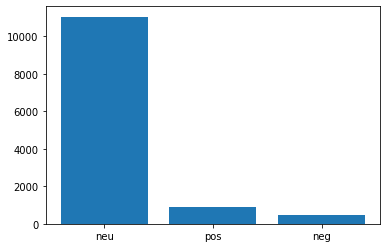

In [66]:
plt.bar(polarity.value_counts().index,
        polarity.value_counts())

# Named entity recognition
Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

There are three standard libraries to do Named Entity Recognition:

- Standford NER
- spaCy
- NLTK

In this tutorial, I will use spaCy which is an open-source library for advanced natural language processing tasks. It is written in Cython and is known for its industrial applications. Besides NER, spaCy provides many other functionalities like pos tagging, word to vector transformation, etc.

There are three pre-trained models for English in spaCy. I will use en_core_web_sm for our task but you can try other models.

In [67]:
import spacy

nlp = spacy.load("en_core_web_sm")

The spaCy model names are broken into four parts, [lang]_[type]_[genre]_[size]:

- Lang — the language of the model (eg en for English).
- Type — model type, core is general purpose and supports vocabulary, syntax, entities, and word vectors.
- Genre — type of text model is trained on (eg web or news).
- Size — model package size — sm, md, or lg.

In our case we will be using an **English** model, which will need to support NER (entities) — so it will be a general-purpose **core** model. Reddit threads align well with the **web** genre, and we will stick with the **small** model size sm.

All of this gives us our model **en_core_web_sm!**


One of the nice things about Spacy is that we only need to apply nlp function once, the entire background pipeline will return the objects we need.

In [68]:
doc=nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

[('India', 'GPE'),
 ('Iran', 'GPE'),
 ('Chabahar', 'PERSON'),
 ('Thursday', 'DATE')]

We can see that India and Iran are recognized as Geographical locations (GPE), Chabahar as Person and Thursday as Date.

We can also visualize the output using displacy module in spaCy.

In [69]:
from spacy import displacy

displacy.render(doc, style='ent')

First, we will run the named entity recognition on our subreddits and store the entity types.

In [70]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

In [72]:
ent=df["content"].\
    apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]

In [73]:
counter=Counter(ent)
count=counter.most_common()

<AxesSubplot:>

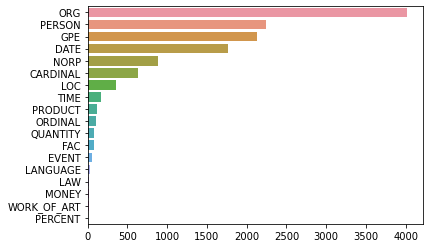

In [74]:
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

Now we can see that the PERSON and ORG dominate the news headlines followed by the GPE entity.

We can also visualize the most common tokens per entity. Let’s check which places appear the most in news headlines.

#### NER for Organizations

In [75]:
def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

In [77]:
org=df["content"].apply(lambda x: ner(x))
org=[i for x in org for i in x]
counter=Counter(org)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

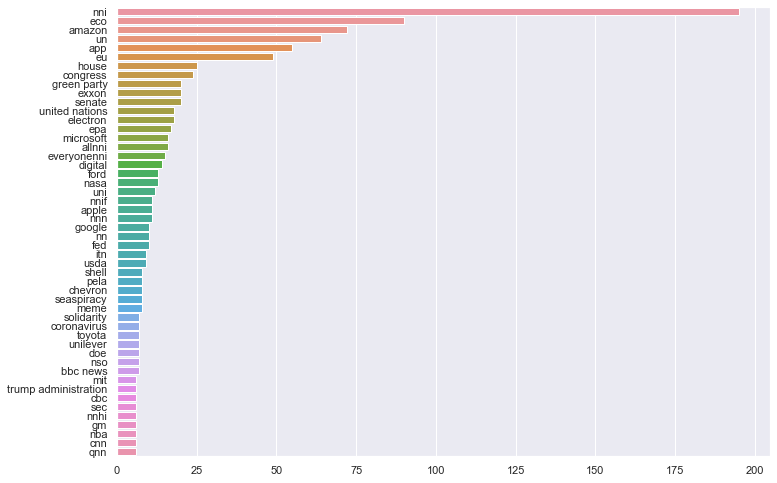

In [80]:
x,y=map(list,zip(*counter.most_common(50)))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(y,x)

#### NER for Person

In [82]:
person=df["content"].apply(lambda x: ner(x,"PERSON"))
person=[i for x in person for i in x]
counter=Counter(person)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

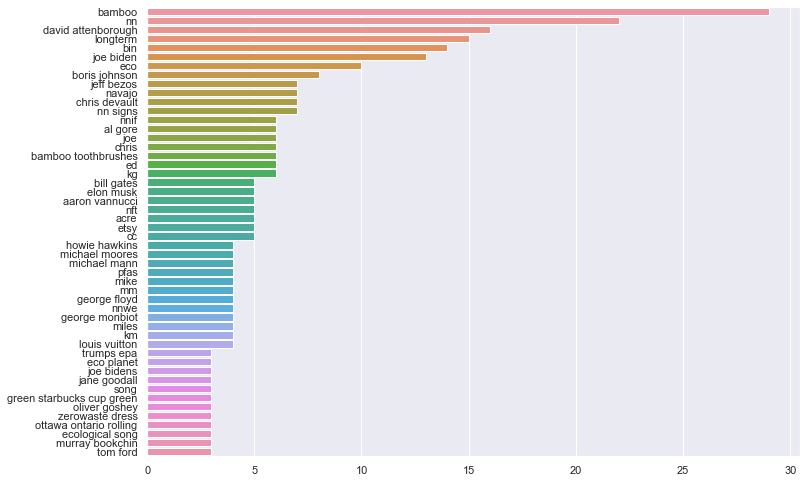

In [84]:
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

#### NER for Geography

In [86]:
gpe=df["content"].apply(lambda x: ner(x,"GPE"))
gpe=[i for x in gpe for i in x]
counter=Counter(gpe)

C:\Users\Naim Cavin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

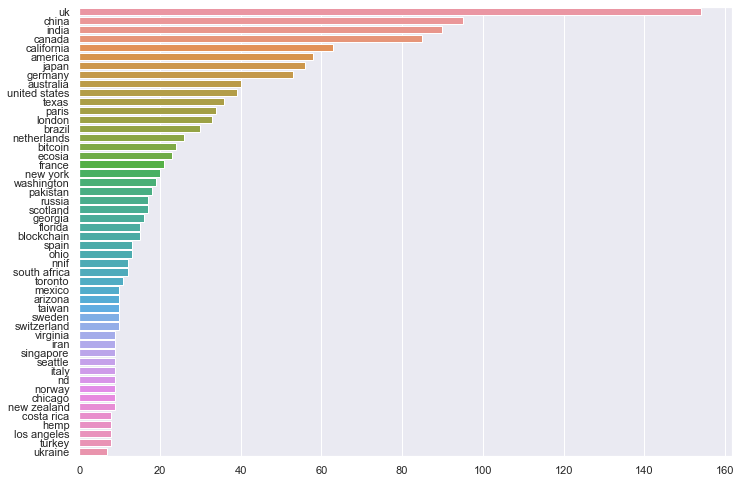

In [87]:
x,y=map(list,zip(*counter.most_common(50)))
sns.barplot(y,x)

### Exploration through parts of speech tagging in Python
Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

- Noun (NN)- Joseph, London, table, cat, teacher, pen, city
- Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
- Adjective(JJ)- beautiful, happy, sad, young, fun, three
- Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
- Preposition (IN)- at, on, in, from, with, near, between, about, under
- Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
- Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
- Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

In [88]:
import nltk
sentence="The greatest comeback stories in 2019"
tokens=word_tokenize(sentence)
nltk.pos_tag(tokens)

[('The', 'DT'),
 ('greatest', 'JJS'),
 ('comeback', 'NN'),
 ('stories', 'NNS'),
 ('in', 'IN'),
 ('2019', 'CD')]

In [89]:
sentence = nlp('The greatest comeback stories in 2019')
displacy.render(sentence, style='dep', jupyter=True, options={'distance': 90})

In [123]:
pos=nltk.pos_tag(word_tokenize(df['content'][0]))

In [124]:
pos=list(map(list,zip(*pos)))

In [125]:
a=pd.DataFrame(pos[0],pos[1])

In [126]:
a.head()

,0
RB,americas
JJ,new
NN,drinking
NN,problem
NN,trump


In [127]:
a.to_csv('a.csv')

In [128]:
a = pd.read_csv('a.csv')
a.head()

,Unnamed: 0,0
0,RB,americas
1,JJ,new
2,NN,drinking
3,NN,problem
4,NN,trump


In [129]:
a.rename(columns={'Unnamed: 0': 'tags', '0': 'words'}, inplace=True)

In [130]:
a.head()

,tags,words
0,RB,americas
1,JJ,new
2,NN,drinking
3,NN,problem
4,NN,trump


In [132]:
counter=Counter(a.tags)

In [133]:
x,y=list(map(list,zip(*counter.most_common(7))))


<AxesSubplot:>

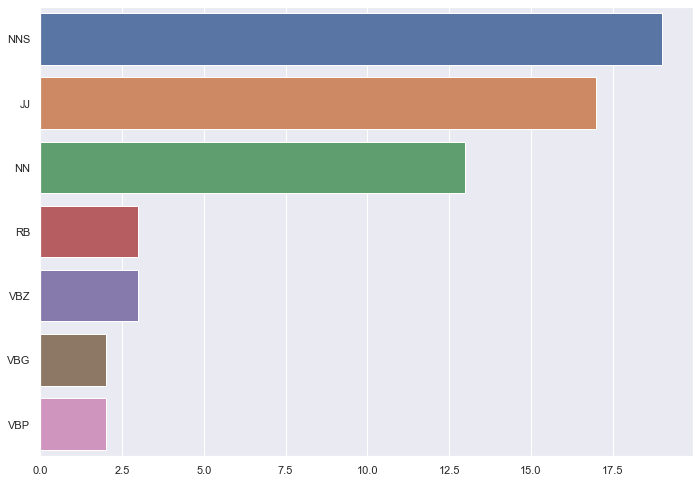

In [134]:
sns.barplot(x=y,y=x)


### Exploring through text complexity
It can be very informative to know how readable (difficult to read) the text is and what type of reader can fully understand it. Do we need a college degree to understand the message or a first-grader can clearly see what the point is?

You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

There are many readability score formulas available for the English language. Some of the most prominent ones are:

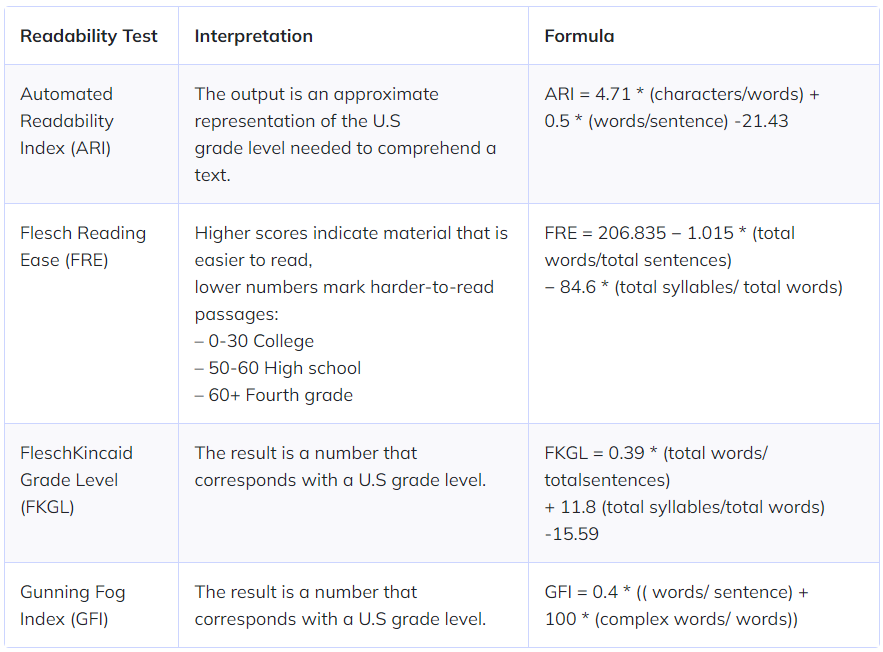

In [135]:
from textstat import flesch_reading_ease

<AxesSubplot:>

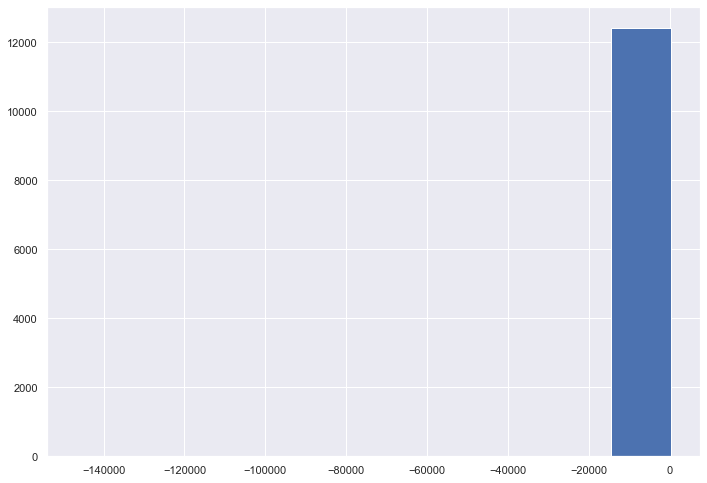

In [139]:
df["content"].apply(lambda x : flesch_reading_ease(x)).hist()

As can be seen from the figure it is not readable

In [141]:
!pip install py-readability-metrics

In [142]:
from readability import Readability

In [143]:
r = Readability(df["content"][0])

In [144]:
r

In [148]:
r.flesch()

ReadabilityException: 100 words required.

In [147]:
df["content"][0]

'americas new drinking problem trump administration rolls clean water act nnnnpresident trumps epa restricted bodies water federal government regulate territorial seas traditional navigable waters perennial intermittent tributaries waters certain lakes ponds impoundments wetlands adjacent jurisdictional waters unfortunately means federal government longer enforcing laws waters including groundwater wetlands adjacent large bodies water seasonal streams flow portion year ephemeral streams flow rainstorms heres means'

In [149]:
df.head()

,id,content,polarity
0,etfi0m,americas new drinking problem trump administra...,1
1,etouq6,trumps gutting environmental rules pushing dar...,1
2,etp02h,greta thunberg brushes mockery finance chief c...,1
3,etpv53,crisis change guardian language changes climat...,1
4,etsaxl,future worse thought,0


In [150]:
df.drop('polarity', inplace=True, axis=1)

In [151]:
df.head()

,id,content
0,etfi0m,americas new drinking problem trump administra...
1,etouq6,trumps gutting environmental rules pushing dar...
2,etp02h,greta thunberg brushes mockery finance chief c...
3,etpv53,crisis change guardian language changes climat...
4,etsaxl,future worse thought


In [152]:
#export to csv
df.to_csv( "clean_df.csv", index=False, encoding='utf-8-sig')